# <font color = 'red'>  Car Amount Prediction using Artificial Neural Nets</font>  <font color = "darkgreen">*By Harshit Dawar* </font>

## <font color = 'brown'>Importing Required Libraries

In [18]:
import pandas as pd            # For using dataframes.
import numpy as np             # For using scientific arrays.
import matplotlib.pyplot as plt    # For plotting the visuals.
from sklearn.preprocessing import MinMaxScaler # For normalizing dataset.
from sklearn.model_selection import train_test_split    # For training & Testing Data.
import tensorflow.keras                                     # For using artificial neural networks.
from keras.models import Sequential                         # For building a Sequential model.
from keras.layers import Dense                              # For Building a Dense Net

## <font color = 'brown'>Importing Dataset 

In [2]:
car_data = pd.read_csv("./Downloads/DL-and-ML-Practical-Tutorials-Package/DL and ML Practical Tutorials - Package/Project 1/Car_Purchasing_Data.csv", encoding = "ISO-8859-1")

In [3]:
car_data.head()    # For having a glance at the data.

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


## <font color = 'brown'> Cleaning the Data

In [4]:
x = car_data.drop(['Customer Name','Customer e-mail', 'Country', "Car Purchase Amount"], axis = 1)      # Required Features
y = car_data['Car Purchase Amount']           # Required Outputs

## <font color = "brown"> Normalizing Data

In [5]:
scale = MinMaxScaler()
x_scaled = scale.fit_transform(x)       # Normalizing Input data
y = y.values.reshape(500,1)             # reshaping it to make the shape of output data from (500,) to (500,1), otherwise fit_transorm will not work
y_scaled = scale.fit_transform(y)

## <font color = "brown"> Training The Model

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size = 0.2)

## <font color = "brown"> Building The Model

In [16]:
model = Sequential()

In [17]:
model.add(Dense(100, input_dim = 5, activation = 'relu'))   # relu = rectified linear unit
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [9]:
model.summary()
# we are having 600 params first becuase 5 inputs * 100 neurons + 100 biases(corresponding to each neuron)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 10,801
Trainable params: 10,801
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ["accuracy"])

In [11]:
epochs_history = model.fit(x_train, y_train, epochs = 55, validation_split = 0.15, batch_size = 57, verbose = 1)



Train on 340 samples, validate on 60 samples
Epoch 1/55
340/340 [==============================] - 0s 1ms/step - loss: 0.1673 - acc: 0.0000e+00 - val_loss: 0.0450 - val_acc: 0.0000e+00
Epoch 2/55
340/340 [==============================] - 0s 64us/step - loss: 0.0362 - acc: 0.0029 - val_loss: 0.0386 - val_acc: 0.0000e+00
Epoch 3/55
340/340 [==============================] - 0s 65us/step - loss: 0.0335 - acc: 0.0029 - val_loss: 0.0376 - val_acc: 0.0000e+00
Epoch 4/55
340/340 [==============================] - 0s 77us/step - loss: 0.0191 - acc: 0.0029 - val_loss: 0.0116 - val_acc: 0.0000e+00
Epoch 5/55
340/340 [==============================] - 0s 64us/step - loss: 0.0088 - acc: 0.0029 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 6/55
340/340 [==============================] - 0s 73us/step - loss: 0.0078 - acc: 0.0029 - val_loss: 0.0055 - val_acc: 0.0000e+00
Epoch 7/55
340/340 [==============================] - 0s 76us/step - loss: 0.0051 - acc: 0.0029 - val_loss: 0.0039 - val_acc: 0.

In [12]:
epochs_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## <font color = "brown"> Plotting the model

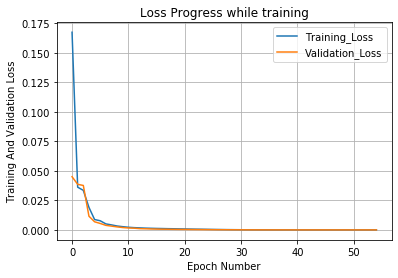

In [13]:
plt.plot(epochs_history.history["loss"])
plt.plot(epochs_history.history["val_loss"])
plt.title("Loss Progress while training")
plt.xlabel("Epoch Number")
plt.ylabel("Training And Validation Loss")
plt.legend(["Training_Loss","Validation_Loss"])
plt.grid()
plt.show()

In [14]:
prediction = model.predict(x_test)

In [15]:
prediction

array([[0.50722975],
       [0.5990427 ],
       [0.5745769 ],
       [0.5544572 ],
       [0.3382627 ],
       [0.48025498],
       [0.5013893 ],
       [0.5836616 ],
       [0.18563135],
       [0.37654412],
       [0.5436158 ],
       [0.77419394],
       [0.4566194 ],
       [0.5369286 ],
       [0.5151465 ],
       [0.51642585],
       [0.41824746],
       [0.4164799 ],
       [0.42254913],
       [0.45056072],
       [0.47190037],
       [0.7117473 ],
       [0.36057338],
       [0.6864976 ],
       [0.33436522],
       [0.38585076],
       [0.55359316],
       [0.4145875 ],
       [0.3645023 ],
       [0.29905796],
       [0.32049003],
       [0.779487  ],
       [0.4691782 ],
       [0.39960107],
       [0.5244806 ],
       [0.6183472 ],
       [0.76450026],
       [0.28835076],
       [0.7272006 ],
       [0.52875954],
       [0.55075693],
       [0.7280708 ],
       [0.64365757],
       [0.6325017 ],
       [0.43075812],
       [0.6862944 ],
       [0.65208   ],
       [0.611